## yapay sinir ağları (ANN) ile rakam tanıma

1- iş problemi (business problem)

2- Veriyi anlamak(data understanding)

3- veriyi hazırlamak (data preparation)

4- modelleme (modeling)

5-Derğerlendirme (evaluation)

## iş problemi (business problem)

problem: insan gücü kaynağını daha verimli kullanabilirmiyiz

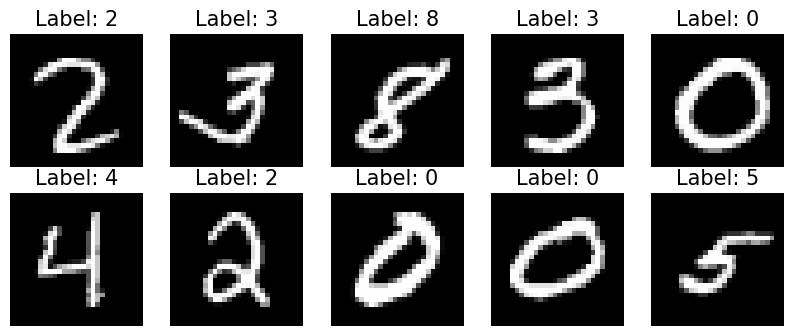


## 2- Veriyi anlamak(data understanding)

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

In [7]:
#mnist veri setinin yüklenmesi

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [12]:
num_labels = len(np.unique(y_train))

In [19]:
num_labels

10

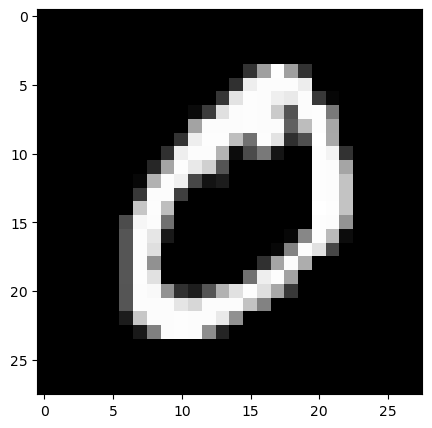

In [21]:
# veri setinden örnek gösterilmesi
plt.figure(figsize=(5,5))
plt.imshow(x_train[1], cmap='gray')

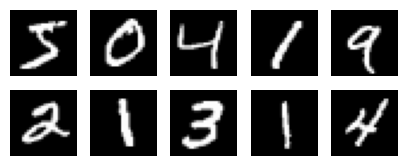

In [23]:
plt.figure(figsize=(5,5))
for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap='gray')
    plt.axis('off')

In [25]:
def visualize_img(data):
    plt.figure(figsize=(5,5))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(x_train[n],cmap='gray')
        plt.axis('off')

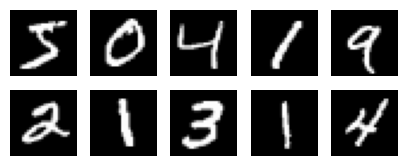

In [27]:
visualize_img(x_train)

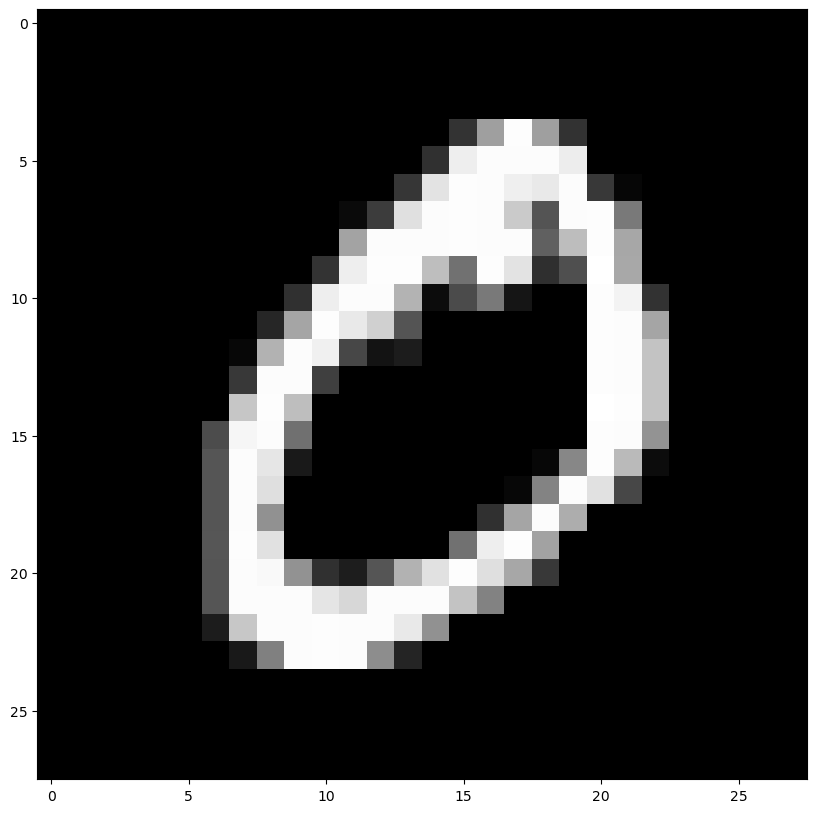

In [29]:
# veri setinden örnek gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[1], cmap='gray')

In [31]:
# RGB
# r:250 g:10 b:250 mor
# renkler 0 ile 155 arasında sayılara denk gelir

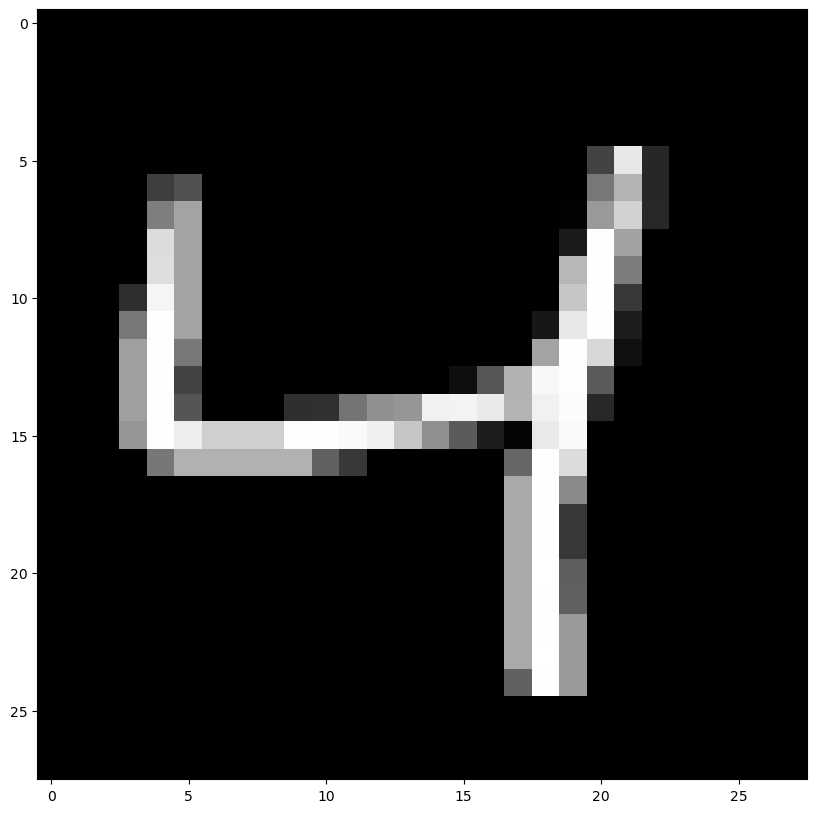

In [33]:
# veri setinden örnek gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap='gray')

In [35]:
x_train[2].shape

(28, 28)

In [37]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [39]:
x_train[2][10,10]

0

In [41]:
x_train[2][14,10]

49

In [43]:
x_train[2].mean()

24.799744897959183

In [45]:
x_train[2].sum()

19443

In [47]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [49]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [51]:
#her pikselin görüntüdeki kodunun fonksiyonu
def pixel_visualize(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img , cmap ='gray')
    width, height = img.shape
    treshold = img.max() / 2.5
    for x in range(width):
        for y in range(height):

            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                       color = 'white' if img[x][y]<treshold else 'black')

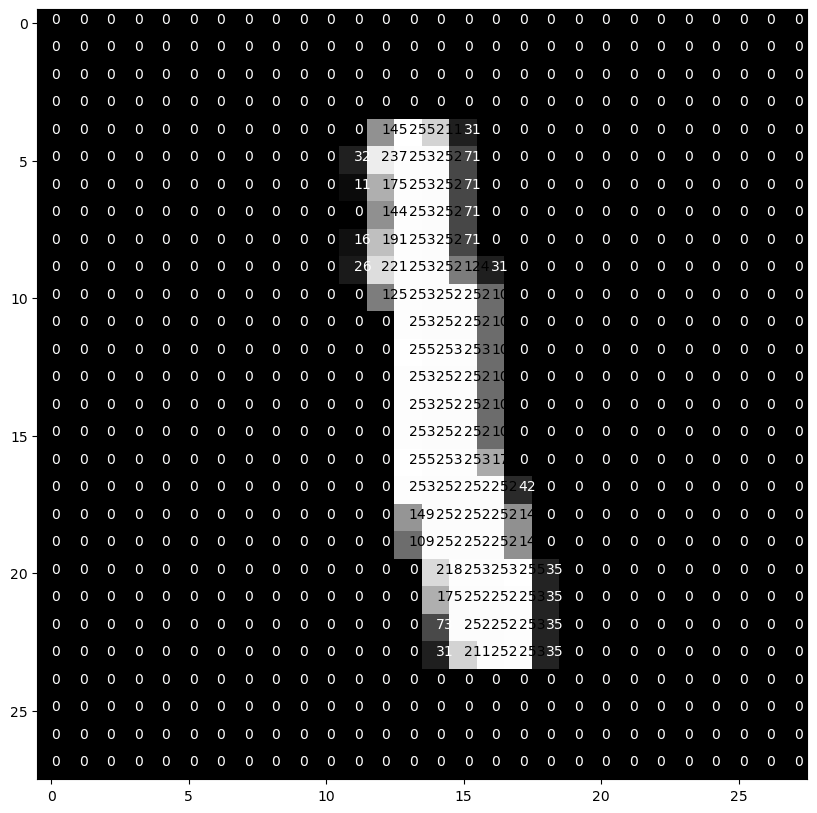

In [53]:
pixel_visualize(x_train[6])

## 3- veriyi hazırlama(data preparation)

### encoding


-önce:[0 1 2 3 4 5 6 7 8 9]

-sonra:[0 0 1 0 0 0 0 0 0]

In [57]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [59]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [61]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### Reshaping

In [64]:
image_size  = x_train.shape[1]

In [66]:
image_size

28

In [68]:
x_train = x_train.reshape(x_train.shape[0], 28 , 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28 , 28, 1)

In [70]:
print(f'x_train boyutu:{x_train.shape}')
print(f'x_test boyutu: {x_test.shape}')

x_train boyutu:(60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


### standardization

In [73]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4- Modelleme(Modeling)

### Sinir Ağı Mimarisini Tanımlamak

In [77]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Input katmanı
    Flatten(),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')
])

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])


In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8310 - loss: 0.6073 - precision: 0.9321 - recall: 0.7074 - val_accuracy: 0.9474 - val_loss: 0.1839 - val_precision: 0.9601 - val_recall: 0.9356
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9505 - loss: 0.1730 - precision: 0.9631 - recall: 0.9386 - val_accuracy: 0.9615 - val_loss: 0.1337 - val_precision: 0.9694 - val_recall: 0.9543
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9659 - loss: 0.1188 - precision: 0.9732 - recall: 0.9587 - val_accuracy: 0.9661 - val_loss: 0.1117 - val_precision: 0.9737 - val_recall: 0.9606
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.0870 - precision: 0.9809 - recall: 0.9714 - val_accuracy: 0.9714 - val_loss: 0.0932 - val_precision: 0.9772 - val_recall: 0.9669
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9794 - loss: 0.0721 - precision: 0.9832 - recall: 0.9758 - val_accuracy: 0.9748 - val_loss: 0.

## 5- Model Başarısını Değerlendirme(Evaluation)

In [84]:
history1 = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9943 - loss: 0.0234 - precision: 0.9949 - recall: 0.9934 - val_accuracy: 0.9775 - val_loss: 0.0760 - val_precision: 0.9786 - val_recall: 0.9756
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9943 - loss: 0.0221 - precision: 0.9949 - recall: 0.9936 - val_accuracy: 0.9771 - val_loss: 0.0766 - val_precision: 0.9795 - val_recall: 0.9758
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9959 - loss: 0.0180 - precision: 0.9965 - recall: 0.9950 - val_accuracy: 0.9786 - val_loss: 0.0728 - val_precision: 0.9804 - val_recall: 0.9772
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9970 - loss: 0.0143 - precision: 0.9975 - recall: 0.9963 - val_accuracy: 0.9774 - val_loss: 0.0768 - val_precision: 0.9789 - val_recall: 0.9760
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9972 - loss: 0.0127 - precision: 0.9975 - recall: 0.9967 - val_accuracy: 0.9745 - val_loss: 0.

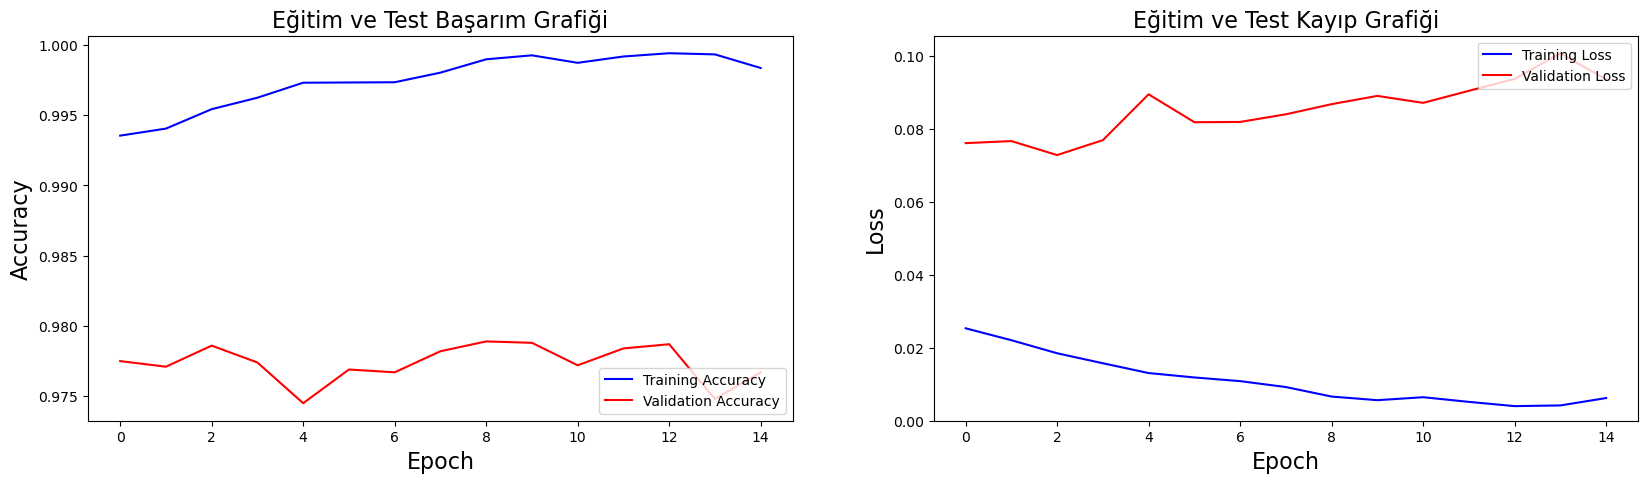

In [86]:
 #########################
# Accuracy ve Loss Grafikleri
#########################

# ----------- Grafik 1: Accuracy --------------------
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

# ----------- Grafik 2: Loss --------------------
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], color='b', label='Training Loss')
plt.plot(history1.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()


In [88]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)

print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))



Test Accuracy: 97.7%

Test Loss: 9.3%

Test Precision: 97.8%

Test Recall: 97.6%


In [92]:
model.save('best_model.h5')

In [118]:
import random
random = random.randint(0,x_test.shape[0])

In [120]:
random

289

In [122]:
test_image = x_test[random]

In [124]:
y_test[random]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

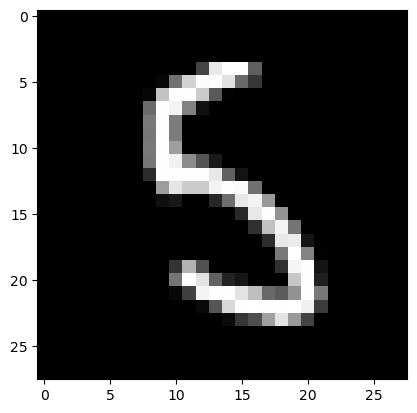

In [126]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')

In [128]:
test_data = x_test[random].reshape(1,28,28,1)

In [130]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [132]:
probability

array([[8.9144505e-14, 1.1799366e-10, 8.8639435e-10, 3.8800413e-06,
        3.5347117e-08, 9.9881577e-01, 5.5569035e-07, 2.0546063e-12,
        1.1728120e-03, 7.0143251e-06]], dtype=float32)

In [134]:
np.argmax(probability)

5